<a href="https://colab.research.google.com/github/mahtabkarami/Projects/blob/main/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload deploy.prototxt and res10_300x300_ssd_iter_140000.caffemodel files.


Saving deploy.prototxt.txt to deploy.prototxt (2).txt
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000 (2).caffemodel
Please upload an image file for face detection.


Saving images.jpeg to images.jpeg
Faces detected in the image.


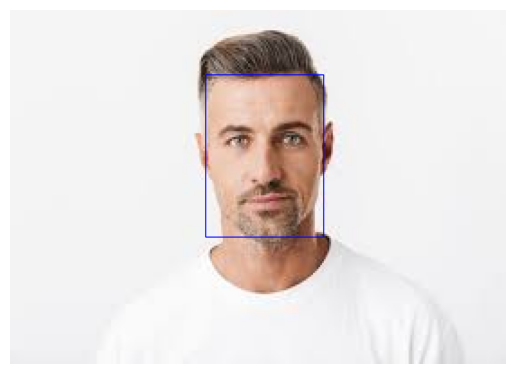

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Upload files for DNN face detection
print("Please upload deploy.prototxt and res10_300x300_ssd_iter_140000.caffemodel files.")
uploaded_files = files.upload()

# Load the pre-trained DNN model for face detection
model = cv2.dnn.readNetFromCaffe('deploy.prototxt.txt', 'res10_300x300_ssd_iter_140000.caffemodel')

def detect_faces_dnn(image):
    # Prepare the image for the DNN model
    blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
    model.setInput(blob)
    detections = model.forward()

    faces_detected = False

    # Loop over the detections and draw rectangles around faces
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:  # Confidence threshold
            box = detections[0, 0, i, 3:7] * np.array([image.shape[1], image.shape[0], image.shape[1], image.shape[0]])
            (startX, startY, endX, endY) = box.astype("int")
            cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)
            faces_detected = True

    return image, faces_detected

# Function to classify detected objects (placeholder)
def classify_object(image):
    # This function should implement a classifier to check if the detected object is a face.
    # For simplicity, we'll assume that if there's no face detected, it's not a human.
    return "face" if np.random.rand() > 0.5 else "non-face"

# Upload an image for detection
print("Please upload an image file for face detection.")
uploaded_image = files.upload()

# Read the uploaded image
image_path = next(iter(uploaded_image))
image = cv2.imread(image_path)

if image is not None:
    # Resize the image if needed
    img_resized = cv2.resize(image, (1400, 1000), interpolation=cv2.INTER_AREA)

    # Use the DNN method for face detection
    detected_image_dnn, faces_detected = detect_faces_dnn(img_resized)

    # Check if any faces were detected
    if faces_detected:
        print("Faces detected in the image.")
    else:
        print("No faces detected. The detected object might be a fruit or animal.")

    # Convert BGR to RGB for displaying with matplotlib
    detected_image_dnn_rgb = cv2.cvtColor(detected_image_dnn, cv2.COLOR_BGR2RGB)

    # Display the result
    plt.imshow(detected_image_dnn_rgb)
    plt.axis('off')
    plt.show()
else:
    print("Image not found or could not be loaded.")
